Machine learning menggunakan metode logistic regression dengan target machine failure menggunakan 2 fitur, Tool wear dan Temperature dan grafik data

In [ ]:
pip install pandas scikit-learn

In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('ai4i2020.csv')

df.rename(columns={'Tool wear [min]': 'tool_wear', 'Process temperature [K]': 'temperature', 'Machine failure': 'machine_failure'}, inplace=True)

data = df[['tool_wear', 'temperature', 'machine_failure']]

In [ ]:
data.isnull().sum()

tool_wear          0
temperature        0
machine_failure    0
dtype: int64

In [ ]:
X = data[['tool_wear', 'temperature']]
y = data['machine_failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("============RESULT============")
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

============RESULT============
Accuracy: 0.9695
Confusion Matrix:
 [[1939    0]
 [  61    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


===========GRAPHS===========

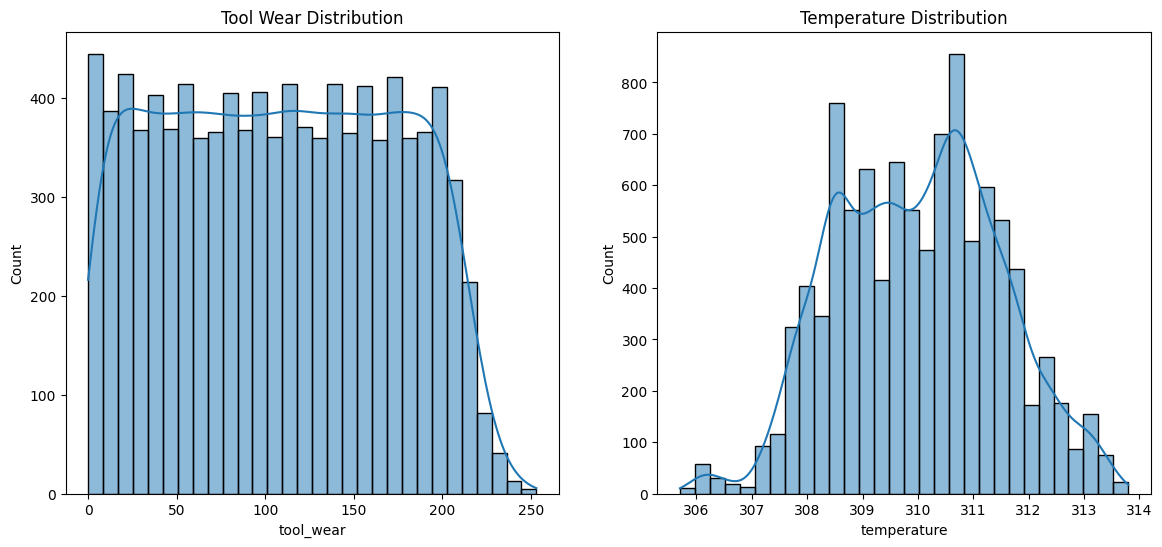

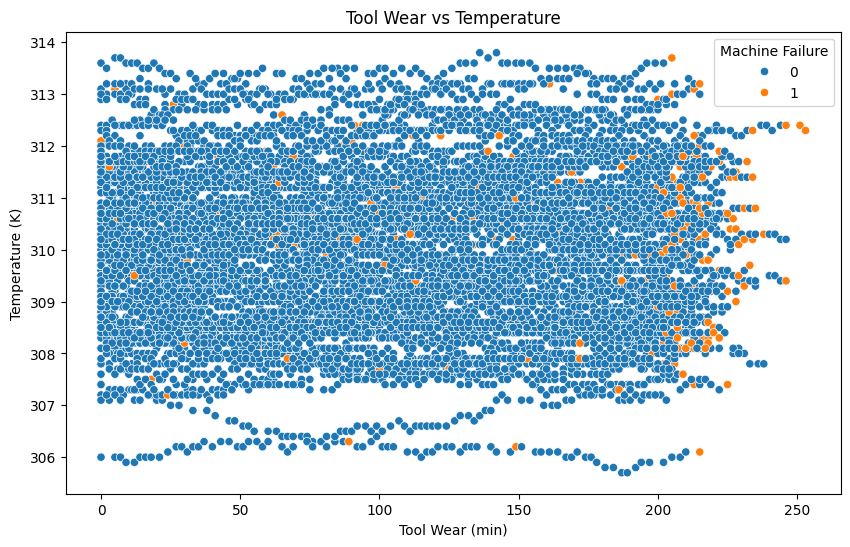

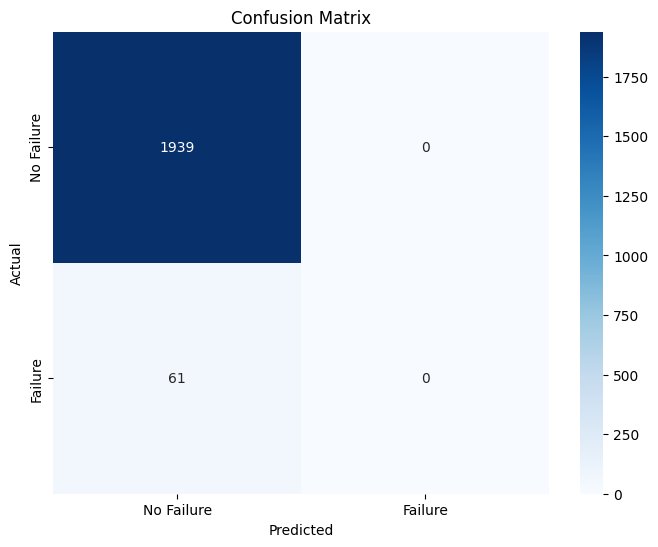

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['tool_wear'], bins=30, kde=True)
plt.title('Tool Wear Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')

plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tool_wear', y='temperature', hue='machine_failure', data=data)
plt.title('Tool Wear vs Temperature')
plt.xlabel('Tool Wear (min)')
plt.ylabel('Temperature (K)')
plt.legend(title='Machine Failure')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
